## TP2 - Object recognition using neural networks and convolutional neural networks

**M4108C/M4109C - INFOgr2D**

**Student 1:** Antoine Gicquel
<br>

For submission: <font style="color:blue"> TP2_nom1_nom2.iypnb </font>, *Due: <font style="color:blue"> 18/03/2018 </font>*

### Introduction

In this lab, we design and observe the performance of the fully connected neural networks (NNs) as well as the convolutional neural networks (CNNs) for object regconition task. All implementations should be in Keras with Tensorflow backend. This lab includes three parts:

In the first part, we perform object recognition using NNs and CNNs on the CIFAR-10 dataset (import from Keras).

In the second part, we work on the image data which are imported from disk.

The last part includes some advanced exercices.

Read and response to each question. Use the *print()* function to show results in *code cells* and write your comments/responses using *Markdown* cells. 

IMPORTANT: Every result should be commented!

NOTE: (max 20 pts)
- part I: 10 pts
- part II: 6 pts
- part III: 2 pts
- clarity and presentation: 2 pts

### Part I. Object recognition using CIFAR-10 dataset <font color='red'> (10 pts)<font/>

#### I-1. The CIFAR-10 data

*1) Load CIFAR dataset and describe its information (number of training/test images, image size, number of classes, class names, etc.)* <font color='red'> (1 pts)<font/>

In [66]:
from __future__ import print_function
import numpy as np
np.random.seed(7)

In [67]:
import keras
from keras.datasets import cifar10

# load and split data into training and test sets --> it may take some times with your own laptop
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [68]:
# describe your data (use print function)
print("train size : ",x_train.shape)
print("test size : ",x_test.shape)
print("train label : ",y_train.shape)
print("test label : ",y_test.shape)
nclass = len(np.unique(y_train))
print("number of classes:",nclass)

train size :  (50000, 32, 32, 3)
test size :  (10000, 32, 32, 3)
train label :  (50000, 1)
test label :  (10000, 1)
number of classes: 10


**Your response:** 

Il y a 50000 images de 32 sur 32 avec 3 caneaux de couleurs pour l'entrainement et 10000 images de test.

*2) Display some image samples with their class labels using matplotlib.pyplot* <font color='red'> (1 pts)<font/>

frog
truck
truck
deer
automobile
automobile
bird
horse
ship


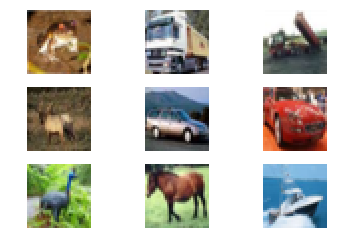

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in range(0,9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray')); plt.axis('off')
    print(labels[y_train[i][0]])

**Your comment:**
Les labels sont donnés du haut vers la droite avec les images correspondantes.

Voici les 9 images.

*3) (If necessary) Reduce the number of training images (using half of them for example) for quick training and small-GPU computer* 
 

In [73]:
x_train = x_train[0:25000,:]
y_train = y_train[0:25000]

print("train size : ",x_train.shape)
print("train label : ",y_train.shape)

train size :  (25000, 32, 32, 3)
train label :  (25000, 1)


On a divisé par deux le nombre d'image.

#### I-2. Fully-connected NNs on CIFAR-10

*1) Design a fully connected NN named 'modelCifar_nn1' including 2 layers of 256 and 512 neurons with the sigmoid activation function. Train this model with 10 epochs and batch_size = 500 (remember to pre-process them before). Test the model and report the following results:* 
- number of total parameters (explain how to compute?)
- training and testing time
- test loss and accuracy
- number of iterations to complete one epoch (explain how to compute?) 
<font color='red'> (2 pts)<font/>

<br/>
Explanation:<br/>
-> one epoch = one forward pass and one backward pass of all the training examples<br/>
-> batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.<br/>

In [74]:
# pre-process your data
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train, nclass)
y_test_cat = np_utils.to_categorical(y_test, nclass)
y_train_cat.shape

print("train size : ",x_train.shape)
print("test size : ",x_test.shape)

train size :  (25000, 3072)
test size :  (10000, 3072)


**Your comment:**
Conversion des labels d'entiers en catégories et conversion des valeurs.

In [75]:
# Define the model
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop

modelCifar_nn1 = Sequential() 
modelCifar_nn1.add(Dense(256, input_shape=(3072,),activation='sigmoid'))
modelCifar_nn1.add(Dense(512, activation='sigmoid'))
modelCifar_nn1.add(Dense(10,activation='softmax')) #Last layer has nclass nodes
modelCifar_nn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_29 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 923,402
Trainable params: 923,402
Non-trainable params: 0
_________________________________________________________________


In [76]:
# compile and train the model
import time
# compile the model
modelCifar_nn1.compile(loss='categorical_crossentropy', optimizer =RMSprop(lr=0.001), metrics=["accuracy"])

# train the model
start_t_mod= time.time()
modelCifar_nn1.fit(x_train, y_train_cat, batch_size=500, epochs = 10)
finish_t_mod = time.time()

time = finish_t_mod - start_t_mod
print("training time :", time)

Epoch 1/10
25000/25000 [==============================] - 6s 224us/step - loss: 2.2377 - acc: 0.1740
Epoch 2/10
25000/25000 [==============================] - 5s 196us/step - loss: 2.0511 - acc: 0.2526
Epoch 3/10
25000/25000 [==============================] - 5s 209us/step - loss: 1.9820 - acc: 0.2882
Epoch 4/10
25000/25000 [==============================] - 5s 214us/step - loss: 1.9315 - acc: 0.3107
Epoch 5/10
25000/25000 [==============================] - 5s 210us/step - loss: 1.8913 - acc: 0.3260
Epoch 6/10
25000/25000 [==============================] - 6s 222us/step - loss: 1.8574 - acc: 0.3390
Epoch 7/10
25000/25000 [==============================] - 5s 214us/step - loss: 1.8218 - acc: 0.3496
Epoch 8/10
25000/25000 [==============================] - 6s 251us/step - loss: 1.7932 - acc: 0.3626
Epoch 9/10
25000/25000 [==============================] - 6s 223us/step - loss: 1.7728 - acc: 0.3725
Epoch 10/10
25000/25000 [==============================] - 5s 204us/step - loss: 1.7501 - a

In [61]:
# evaluate the model
score = modelCifar_nn1.evaluate(x_test, y_test_cat)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


10000/10000 [==============================] - 2s 206us/step
Test loss: 1.58497973099
Test accuracy: 0.4348


**Your observation and comment:**
L'exactitude est de 43% avec le modele sigmoid et 10 etochs.

*2) Design the NN model named modelCifar_nn2 by replacing the sigmoid activation with the ReLu activation. Train and test this model. Compare to the first one.* <font color='red'> (1 pts)<font/>

In [78]:
# Define the model 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop

modelCifar_nn2 = Sequential() 
modelCifar_nn2.add(Dense(256, input_shape=(3072,),activation='relu'))
modelCifar_nn2.add(Dense(512, activation='relu'))
modelCifar_nn2.add(Dense(10,activation='softmax')) #Last layer has nclass nodes
modelCifar_nn2.summary()

# compile and train the model
import time
# compile the model
modelCifar_nn2.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ["accuracy"])

# train the model
start_t_mod= time.time()
modelCifar_nn2.fit(x_train, y_train_cat, batch_size = 500, epochs = 10)
finish_t_mod = time.time()

time = finish_t_mod - start_t_mod
print("training time :", time)

# evaluate the model
score = modelCifar_nn2.evaluate(x_test, y_test_cat)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 923,402
Trainable params: 923,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25000/25000 [==============================] - 5s 215us/step - loss: 5.8744 - acc: 0.1264
Epoch 2/10
25000/25000 [==============================] - 5s 202us/step - loss: 4.1330 - acc: 0.1454
Epoch 3/10
25000/25000 [==============================] - 5s 206us/step - loss: 4.0474 - acc: 0.1620
Epoch 4/10
25000/25000 [==============================] - 5s 204us/step - loss: 5.2667 - acc: 0.1

**Your observation and comment:** L'exactitude est de 20% avec le modele sigmoid et 10 etochs.

#### I-2. CNNs on CIFAR-10

*1) Now design a CNN named modelCifar_cnn1 consisting of 2 convolutional layers + one fully-connected layer as follows:*
- Conv_1: 16 filters of size 3x3, no padding, no stride, activation Relu
- maxPool_1: size 2x2
- Conv_2: 32 filters of size 3x3, no padding, no stride, activation Relu
- maxPool_2: size 2x2
- fc layer (Dense) 128 nodes
- [Do not forget Flatten() and final output dense layer with 'softmax' activation]

*Reload and preprocess the data. Train this model with 10 epochs and batch_size = 500. Test the model and report the following results:*
- number of total parameters (explain how to compute?)
- training and testing time
- test loss and accuracy
<font color='red'> (2 pts)<font/>

In [176]:
# reload and pre-process your data
(x2_train, y2_train), (x2_test, y2_test) = cifar10.load_data()

#x2_train = x_train[0:25000,:]
#y2_train = y_train[0:25000]

x2_train = x2_train.astype('float32')
x2_test = x2_test.astype('float32')
x2_train = x2_train / 255.0
x2_test = x2_test / 255.0

# one hot encode outputs
y2_train = np_utils.to_categorical(y_train)
y2_test = np_utils.to_categorical(y_test)

print("train 2 size : ",x2_train.shape)
print("test 2 size : ",x2_test.shape)
print("train 2 label : ",y2_train.shape)
print("test 2 label : ",y2_test.shape)

train 2 size :  (25000, 3072)
test 2 size :  (10000, 32, 32, 3)
train 2 label :  (25000, 10)
test 2 label :  (10000, 10)


In [177]:
# Define the model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.constraints import maxnorm

modelCifar_cnn1 = Sequential() 
modelCifar_cnn1.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(y2_test.shape[1])))
modelCifar_cnn1.add(MaxPooling2D(pool_size=(2, 2)))
modelCifar_cnn1.add(Dropout(0.2))
modelCifar_cnn1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(y2_test.shape[1])))
modelCifar_cnn1.add(MaxPooling2D(pool_size=(2, 2)))
modelCifar_cnn1.add(Flatten())
modelCifar_cnn1.add(Dense(128, activation='relu', kernel_constraint=maxnorm(y2_test.shape[1])))
modelCifar_cnn1.add(Dropout(0.5))
modelCifar_cnn1.add(Dense(10, activation='softmax'))

In [178]:
# compile and train the model
import time
from keras.optimizers import SGD
# compile the model
#modelCifar_cnn1.compile(loss='categorical_crossentropy', optimizer =RMSprop(lr=0.001), metrics=["accuracy"])
#modelCifar_cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

modelCifar_cnn1.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
#modelCifar_cnn1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# train the model
start_t_mod= time.time()
modelCifar_cnn1.fit(x2_train, y2_train, validation_data=(x2_test, y2_test), epochs=epochs, batch_size=500)
finish_t_mod = time.time()

time = finish_t_mod - start_t_mod
print("training time :", time)

ValueError: Error when checking input: expected conv2d_76_input to have 4 dimensions, but got array with shape (25000, 3072)

In [ ]:
# evaluate the model
score = modelCifar_cnn1.evaluate(x2_test, y2_test_cat)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

**Your observation and comment:**

*2) Now modify the modelCifar_cnn1 by changing the filter size of 2 convolutional layers to 5x5. The new model is called modelCifar_cnn2. Train and test the model. Compare to the first CNN.* <font color='red'> (1 pts)<font/>

In [ ]:
# Define the model 
# modelCifar_cnn2 = Sequential() 



**Your observation and comment:**

*3) Compare the two CNNs with the two NNs in section I-1 in terms of accuracy, loss, number of parameters, calculation time, ect. * <font color='red'> (2 pts)<font/>

*Fill the following table for comparison:*

| Models         | Number of parameters  |  Training time | Accuracy | 
| ---------------|:---------------------:|:--------------:|:--------:|
| modelCifar_nn1 | 
| modelCifar_nn2 | 
| modelCifar_cnn1| 
| modelCifar_cnn2| 



**Your observation and comment:**

### Part II - Cat and Dog classification <font color='red'> (6 pts)<font/>

In this part, we design and train CNNs on our data (import from disk). We will work on a small dataset including only 2 classes (cat and dog). Each one has 1000 images for training and 200 for validation.

You can download the data from: 
(https://drive.google.com/open?id=15cQfeAuDY1CRuOduF5LZwWZ4koL6Dti9)

 *1) Describe the downloaded data: numer of training and validation images, number of classes, class names? Do the images have the same size?* <font color='red'> (1 pts)<font/>

**Your response:**

 *2) Show some cat and dog images from the train set. Comment.* <font color='red'> (1 pts)<font/>

Now we import the ImageDataGenerator module of Keras. This module can be used to pre-process the images and to perform data augmentation. We use *'flow_from_directory()'* to generate batches of image data (and their labels) directly from our images in their respective folders (from disk).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batchSize = 100
datagen = ImageDataGenerator(rescale=1./255)

train_datagen = datagen.flow_from_directory(
        'dataTP2/train',  # this is your target directory which includes the training images
        target_size = (50, 50),  # all images will be resized to 50x50 pixels for fast computation
        batch_size = batchSize,
        class_mode = 'categorical')  

validation_datagen = datagen.flow_from_directory(
        'dataTP2/validation', # this is your target directory which includes the validation images
        target_size = (50, 50),  # all images will be resized to 50x50 pixels for fast computation
        batch_size = batchSize,
        class_mode = 'categorical')


 *3) Now describe your pre-processed data for training and validation: numer of training and validation images, number of classes, class names? Do the images have the same size?* <font color='red'> (1 pts)<font/>

**Your response:**

*4) Redefine, train and validate the 2 CNNs in Part I (namely modelPart2_cnn1, modelPart2_cnn2) on the new data using model.fit_generator instead of model.fit. Observe and compare the results.* <font color='red'> (3 pts)<font/>

In [ ]:
# Define the model 
# modelPart2_cnn1 = Sequential() 



In [ ]:
# train with .fit_generator
# modelPart2_cnn1.fit_generator(...)


In [ ]:
# Define the model 
# modelPart2_cnn2 = Sequential() 


In [ ]:
# train with .fit_generator
# modelPart2_cnn2.fit_generator(...)



**Your observation and comments:**

### Part III - Advances <font color='red'> (2 pts)<font/>


In this part, you are free to improve your CNN performance using *Data augmentation*, *Dropout*, *batch normalization*, etc. Define at least 2 more CNNs to improve the classification performance of the CIFAR-10 dataset based on the first CNN (modelCifar_cnn1). That means you are not allowed to add more layers, change the number of filters or filter size, etc. Only the use of *Data augmentation*, *Dropout*, *batch normalization* is allowed. To use these techniques, further reading is required.

For each one, you are required to define the model, train, test and report the results.

In [ ]:
# Define new model 
# modelCifar_cnn3 = Sequential() 
# train and test


**Result, observation and comment:**

In [ ]:
# Define new model 
# modelCifar_cnn4 = Sequential() 
# train and test

**Result, observation and comment:**